### Import packages and raw data

In [65]:
import pandas as pd
import numpy as np
import re
pd.options.mode.chained_assignment = None  # default='warn'

In [66]:
df_rest_check = pd.read_csv('../raw_data/HarvestNameCategories.csv')
df_rest = pd.read_csv('../raw_data/restaurants2.csv')
print(df_rest_check.shape)
print(df_rest.shape)

(2203, 3)
(1284, 9)


### Functions

In [67]:
def cat_transformer(df, column_replaced_categ, column_map_name):
    """Tranform the restaurant category into ther new category"""
    restaurants_change = list(category_transformer.keys())
    new_cat = []
    
    for k, v in df.iterrows():
        if v['restaurant_name'] in restaurants_change:
            new_cat.append(category_transformer[v[column_map_name]])
        else:
            new_cat.append(v[column_replaced_categ])
        
    return new_cat

def tradx(x):    
    """Translate restaurants' services"""
    trad =  []
    for i in x:
        trad.append(dict_trad[i])
    return trad

### Actions

In [68]:
df_rest_check.drop_duplicates(inplace=True)
df_rest_check.head(3)

,Unnamed: 0,restaurant_name,restaurant_category
0,0,Brunch Café,cafe
1,0,Stanislav Café,cafe
2,0,the mill,cafe


In [69]:
list_check = list(df_rest_check['restaurant_category'].unique())

new_list = []

for i in range(len(list_check)):
    rank = 1
    for x in df_rest_check[df_rest_check['restaurant_category'] == list_check[i]]['restaurant_category']:
        new_list.append(rank)
        rank += 1
    
df_rest_check['rank'] = new_list
print(df_rest_check.shape)
df_rest_check.head(3)

(2121, 4)


,Unnamed: 0,restaurant_name,restaurant_category,rank
0,0,Brunch Café,cafe,1
1,0,Stanislav Café,cafe,2
2,0,the mill,cafe,3


In [70]:
df_rest_check = df_rest_check.sort_values(by=['restaurant_name','rank']).drop_duplicates(subset='restaurant_name').drop(columns='rank')

In [71]:
category_transformer = dict(zip(list(df_rest_check.restaurant_name), list(df_rest_check.restaurant_category)))
category_transformer

{'#Treestory': 'georgian',
 '100 Montaditos': 'tapas restaurant',
 '11 Tapas - Restaurante & Cocktail, WineBar': 'tapas restaurant',
 '1º de Maio': 'portuguese',
 '28 Café': 'cafe',
 '3 Amigos': 'mexican',
 '39 Degraus': 'brunch',
 '4s Burger House': 'indian nepalese restaurant',
 'A Baiuca': 'fado restaurant',
 'A Burgueria Regional': 'burger restaurant',
 'A Cevicheria': 'preuvian mexican argentinian restaurant',
 'A Cultura do Hambúrguer': 'burger restaurant',
 'A Grelha Marisqueira E Churrasqueira': 'seafood restaurant',
 'A Loja do Sr. Rocha': 'cafe',
 'A Marisqueira do Lis': 'seafood restaurant',
 'A Merendinha do Arco Bandeira': 'portuguese',
 'A Minhota da Prata': 'portuguese',
 'A Muralha Tapas e Vinhos': 'tapas restaurant',
 'A Muralha Tasca Típica Lisboa': 'seafood restaurant',
 'A Nossa Casa': 'european restaurant',
 'A Obra': 'tapas restaurant',
 'A Padaria Portuguesa': 'pastry pasteleria bakery patisserie cake dessert',
 'A Padaria do Papa Poule': 'pastry pasteleria baker

In [72]:
df_rest['restaurant_category'] = cat_transformer(df_rest, 'restaurant_category', 'restaurant_name')

In [73]:
df = df_rest[df_rest['restaurant_name'].isin(list(category_transformer.keys()))]

In [74]:
df['restaurant_category'] = df['restaurant_category'].map(lambda x : x.replace(' restaurant','').strip(' '))

In [75]:
unique_cats = list(set(df['restaurant_category'].unique()))

In [76]:
dict_gather_cats = dict(zip(unique_cats, unique_cats))
dict_gather_cats ###Copy Paste the print to create your dict

{'asian thai vietnamese chinese': 'asian thai vietnamese chinese',
 'moroccan': 'moroccan',
 'portuguese': 'portuguese',
 'european': 'european',
 'italian': 'italian',
 'fast_food': 'fast_food',
 'pasta': 'pasta',
 'grill barbecue steak': 'grill barbecue steak',
 'pastry pasteleria bakery patisserie cake dessert': 'pastry pasteleria bakery patisserie cake dessert',
 'burger': 'burger',
 'mediterranean': 'mediterranean',
 'preuvian mexican argentinian': 'preuvian mexican argentinian',
 'grill': 'grill',
 'tapas': 'tapas',
 'asian': 'asian',
 'halal': 'halal',
 'fado': 'fado',
 'portuguese traditional tradicional cozinha': 'portuguese traditional tradicional cozinha',
 'seafood': 'seafood',
 'mexican': 'mexican',
 'bistro': 'bistro',
 'bar': 'bar',
 'turkishgeorgianhalal': 'turkishgeorgianhalal',
 'georgian': 'georgian',
 'turkish': 'turkish',
 'veggie healthy vegan': 'veggie healthy vegan',
 'japanese': 'japanese',
 'argentinian': 'argentinian',
 'cafe': 'cafe',
 'thai': 'thai',
 'chic

In [77]:
dict_gather_cats = {
 'tapas': 'european',
 'asian thai vietnamese chinese': 'asian',
 'turkishgeorgianhalal': 'africa_ME',
 'portuguese traditional tradicional cozinha': 'portuguese',
 'indian nepalese': 'indian_nepalese',
 'grill': 'grill',
 'georgian': 'africa_ME',
 'african': 'africa_ME',
 'burger': 'burger',
 'brunch': 'brunch',
 'halal': 'africa_ME',
 'asian thai': 'asian',
 'fast_food': 'fast_food',
 'fado': 'fado',
 'pizza pizaria': 'pizza',
 'portuguese': 'portuguese',
 'chicken': 'chicken',
 'moroccan': 'africa_ME',
 'bistro': 'bistro',
 'argentinian': 'south_america',
 'thai': 'asian',
 'cafe': 'cafe',
 'seafood': 'seafood',
 'japanese': 'japanese',
 'italian': 'italian',
 'pasta': 'pasta',
 'veggie healthy vegan': 'veggie_healthy',
 'asian': 'asian',
 'european': 'european',
 'pastry pasteleria bakery patisserie cake dessert': 'pastry',
 'grill barbecue steak': 'grill',
 'turkish': 'africa_ME',
 'bar': 'bar',
 'mexican': 'mexican',
 'mediterranean': 'mediterranean',
 'preuvian mexican argentinian': 'south_america'
}

In [78]:
df['restaurant_category'] = df['restaurant_category'].map(lambda x : dict_gather_cats[x])

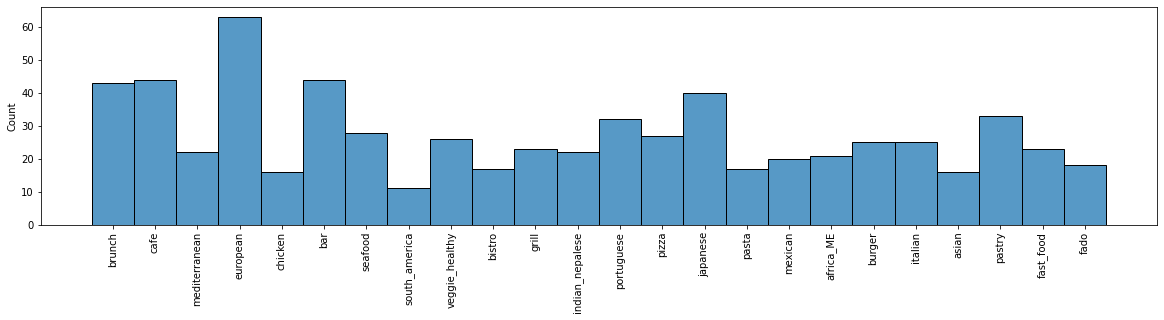

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

df_column = df['restaurant_category']

plt.figure(figsize=(20,4))
sns.histplot([str(i) for i in df_column], bins=len(list(df_column)))
plt.xticks(rotation=90);

In [80]:
df.drop(columns=['Index', 'restaurant_description'], inplace=True)

In [81]:
df['restaurant_rating'] = df['restaurant_rating'].map(lambda x : float(str(x).replace(',','.')))

In [82]:
df['restaurant_comment_number'] = df['restaurant_comment_number'].map(lambda x : str(x)
                                                                      .replace(' Google reviews','')
                                                                      .replace(' comentários no Google', '')
                                                                      .replace(' Google review','')
                                                                      .replace(' comentário no Google', '')
                                                                      .strip(' ')
                                                                      .replace(',',''))

In [83]:
dict_trad = {'Comer no local':'Dine-in',
             'Com recolha móvel':'Curbside pickup',
             'Não faz entregas':'No delivery',
             'Não serve take away':'No takeaway',
             'Não permite comer no local':'No dine-in',
             'Take away':'Takeaway',
             'Entrega sem contacto':'No-contact delivery',
             'Drive-thru':'Drive-through',
             'Entrega':'Delivery'}

In [84]:
df['restaurant_price_range'] = df['restaurant_price_range'].map(lambda x : str(x).replace('€','£'))
df['restaurant_services'] = df['restaurant_services'].map(lambda x : str(x).replace('\'','').strip('][').split(', '))
df['restaurant_services'] = df['restaurant_services'].map(lambda x : tradx(x) if any(w in x for w in dict_trad.keys()) else x)

In [85]:
unique_services_sets = set(i for i in df['restaurant_services'].map(lambda x : str(x)).unique())

In [86]:
def keep_numeric(x):
    return re.sub("[^0-9]", "", x)

def replace_price(x):
    if x == "£":
        return 1
    if x == "££": 
        return 2 
    if x == "£££": 
        return 3 
    if x == "££££": 
        return 4 
    
#Function latitude/ longitude

def latitude(column):
    key = pd.read_csv("../raw_data/api_key.csv", header=None)
    key = key.loc[0,0]
    gmaps = googlemaps.Client(key=key)
    # Geocoding an address
    geocode_result = gmaps.geocode(column)
    return float(geocode_result[0]['geometry']['location']['lat'])

def longitude(column):
    key = pd.read_csv("../raw_data/api_key.csv", header=None)
    key = key.loc[0,0]
    gmaps = googlemaps.Client(key=key)
    # Geocoding an address
    geocode_result = gmaps.geocode(column)
    return float(geocode_result[0]['geometry']['location']['lng'])

def get_postal_code(x):
    g = re.findall(r'\d{4}-\d{3}', x)
    if g ==[]: 
        return '1100-083'
    else: 
        return g[0]
    
#Function labels 
def labels_eat_on_site(x):
    if 'dine-in' in x:
        return 1 
    else: 
        return 0
    
def labels_delivery(x):
    if ('delivery' in x) or ('no-contact delivery' in x):
        if ( 'no delivery' in (x)):
            return 0
        else: 
            return 1
    else: 
        return 0
    
def labels_takeaway(x):
    if ('takeaway' in x):
        return 1
    else: 
        return 0

def labels_drive_thru(x):
    if ('drive-through' in x):
        return 1
    else: 
        return 0
    
def labels_no_del(x):
    if ( 'no delivery' in (x)):
        return 1
    else: 
        return 0    
    
def labels_curbside(x):
    if ( 'curbside pickup' in (x)):
        return 1
    else: 
        return 0
    
#post code format for post codes table 
def post_code2(x):
    return (x[0:4]+'-'+x[4:])  

In [87]:
# Importing the data in form 2 and basic preprocessing (this takes a bit of time)
data= df.copy()
data=data.rename(columns={'restaurant_name':"name" , 
                          'restaurant_category':"type", 
                          'restaurant_description':"description", 
                          'restaurant_rating':"rating", 
                          'restaurant_comment_number':"review_count", 
                          'restaurant_price_range': "price", 
                          'restaurant_location':"address", 
                          'restaurant_services':"label"})

data=data.dropna(subset=['rating']) # dropping rows with no rating 
data.label=data.label.fillna(value='Dine-in')# replacing rows with no label by ['Dine-in']
data.type=data.type.fillna(value='Restaurant')

# Column rating
data.rating=pd.to_numeric(data.rating, downcast="float")

# Column review_count
data.review_count=data.review_count.map(keep_numeric)
data.review_count=pd.to_numeric(data.review_count, downcast="float")

#Column price 
data.price = data.price.map(replace_price)

#Adress into latitude and longitude 
#data['latitude']=data.address.map(latitude)
#data['longitude']=data.address.map(longitude)

# handling the label 
data.label = [str(i).lower() for i in data['label']]
data['dine_in']=data.label.map(labels_eat_on_site)
data['takeaway']=data.label.map(labels_takeaway)
data['delivery']=data.label.map(labels_delivery)
data['drive_through']=data.label.map(labels_drive_thru)
data['no_del_exp']=data.label.map(labels_no_del)
data['curb_pickup']=data.label.map(labels_curbside)

# handling the type
data.type=data.type.replace('restaurant', '', regex=True)
data.type= data.type.str.lower()
#data.type=data.type.map(deletespace)
#add postal code
data['postal_code']=data.address.map(get_postal_code)

#handling remaining null values (price):
data.price=data.price.fillna(value=np.mean(data.price)).astype(int) ## CHOICE 1 TO BE CONFIRMED: FILLING THE NA O

data_post=pd.read_csv("../raw_data/cod_post_freg_matched.txt")
data_post.CodigoPostal=data_post.CodigoPostal.astype(str)
data_post.CodigoPostal=data_post.CodigoPostal.map(post_code2)
data_post=data_post[['CodigoPostal', 'Concelho', 'Freguesia']]
data_post=data_post.rename(columns={'CodigoPostal':'postal_code', 'Distrito': 'district', 'Concelho': 'municipality', 'Freguesia': 'neighborhood'} )
data=data.merge(data_post, on='postal_code', how='left')

In [88]:
print(data.shape)
data

(652, 16)


,name,type,rating,review_count,price,address,label,dine_in,takeaway,delivery,drive_through,no_del_exp,curb_pickup,postal_code,municipality,neighborhood
0,Augusto Lisboa,brunch,4.8,1032.0,2,"Rua Santa M.nha 26, 1100-491 Lisboa, Portugal","['dine-in', 'takeaway', 'no delivery']",1,1,0,0,1,0,1100-491,Lisboa,Graça
1,Tiffin Cafe & Restaurant Lisboa,cafe,4.9,139.0,2,"R. do Conde 32, 1200-637 Lisboa, Portugal","['dine-in', 'takeaway', 'delivery']",1,1,1,0,0,0,1200-637,Lisboa,Prazeres
2,Crisfama,mediterranean,4.8,649.0,1,"Rua da Cruz de Santa Apolónia 56, 1100-188 Lis...","['dine-in', 'takeaway', 'no delivery']",1,1,0,0,1,0,1100-188,Lisboa,Santa Engrácia
3,Alma,european,4.8,953.0,4,"R. Anchieta 15, 1200-224 Lisboa, Portugal","['dine-in', 'no takeaway', 'no delivery']",1,1,0,0,1,0,1200-224,Lisboa,São Paulo
4,Restaurant CHULHO & Bar,chicken,4.9,180.0,1,"R. de São João da Mata 82, 1200-850 Lisboa, Po...","['dine-in', 'takeaway', 'delivery']",1,1,1,0,0,0,1200-850,Lisboa,Lapa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647,CASA DOS AMIGOS,mexican,4.2,125.0,1,"R. dos Remédios 140, 1100-451 Lisboa","['dine-in', 'takeaway', 'no delivery']",1,1,0,0,1,0,1100-451,Lisboa,Santo Estevão
648,El Paso Cantina Mexicana y Cocktail Bar,mexican,4.0,8.0,1,"R. das Portas de Santo Antão 125, 1150-312 Lisboa","['dine-in', 'takeaway']",1,1,0,0,0,0,1150-312,Lisboa,Santa Justa
649,La fugitiva,mexican,4.3,22.0,1,"Rua de S. Paulo 186, 1200-058 Lisboa","['dine-in', 'takeaway']",1,1,0,0,0,0,1200-058,Lisboa,São Paulo
650,Tico y Taco,mexican,4.8,4.0,1,"R. da Atalaia 4, 1200-050 Lisboa","['dine-in', 'takeaway']",1,1,0,0,0,0,1200-050,Lisboa,Encarnação


In [91]:
data.to_csv('../small_business/data/restaurants.csv')